In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
#load Dataset
data = pd.read_csv(r"C:\Users\Thangaraj Pandian\OneDrive\Documents\Python\Datasets\employee_ml_performance_data.csv")
data.head()

,experience,attendance,training_hours,performance_score,performance_level
0,1,65,10,45,Low
1,2,70,15,52,Average
2,3,80,20,68,Average
3,4,85,25,75,High
4,5,90,30,88,High


In [5]:
#Encode Target Column
le = LabelEncoder()
data["performance_level"] = le.fit_transform(data["performance_level"])

In [6]:
#Furture & Target split
X = data[["experience", "attendance", "training_hours", "performance_score"]]
y = data["performance_level"]

In [7]:
#Train - Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
#logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

print("Logistic Regression Accuracy:", lr_acc)
print(lr_cm)


Logistic Regression Accuracy: 1.0
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [9]:
#Decsion Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print("Decision Tree Accuracy:", dt_acc)
print(dt_cm)


Decision Tree Accuracy: 1.0
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [10]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)
print(rf_cm)


Random Forest Accuracy: 1.0
[[1 0 0]
 [0 2 0]
 [0 0 3]]


In [11]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

print("KNN Accuracy:", knn_acc)
print(knn_cm)


KNN Accuracy: 0.8333333333333334
[[1 0 0]
 [0 2 0]
 [1 0 2]]


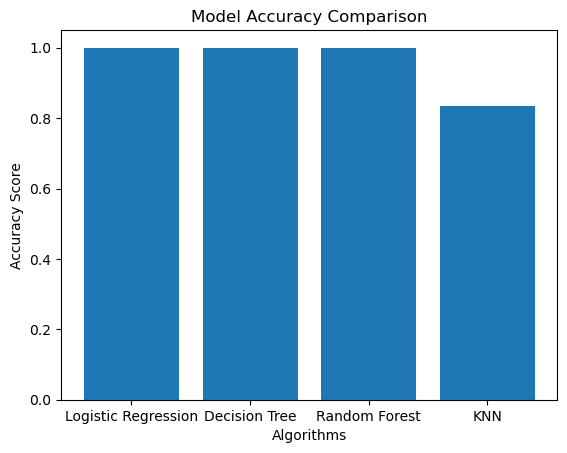

In [12]:
#Bar Chart - Accuracy Comparison
models = ["Logistic Regression", "Decision Tree", "Random Forest", "KNN"]
accuracies = [lr_acc, dt_acc, rf_acc, knn_acc]

plt.figure()
plt.bar(models, accuracies)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()


In [13]:
# Best Model Decision
accuracy_dict = {
    "Logistic Regression": lr_acc,
    "Decision Tree": dt_acc,
    "Random Forest": rf_acc,
    "KNN": knn_acc
}

best_model = max(accuracy_dict, key=accuracy_dict.get)
print("Best Model:", best_model)


Best Model: Logistic Regression
